
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Samir Epili (se7982)
2. Siddhant Chauhan (sc54788) 

# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [ ]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [ ]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [ ]:
from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(X_train,y_train)

# R2 Values

life_pred_train = reg.predict(X_train)
life_pred_test = reg.predict(X_test)

print('Coefficient of determination for Train: %.2f' % r2_score(y_train, life_pred_train))
print('Coefficient of determination for Test: %.2f' % r2_score(y_test, life_pred_test))

Coefficient of determination for Train: 0.89
Coefficient of determination for Test: 0.84


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

scores = []

alphas=10**np.linspace(1,-2,100)*0.5

for alpha in alphas:
    
    # lasso run
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=100000, normalize = True, copy_X = True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores += [lasso.score(X_test, y_test)]
    
# best alpha and corresponding R^2
alpha_score = pd.DataFrame()
alpha_score['Alphas'] = alphas
alpha_score['R2'] = scores
bestidx = alpha_score['R2'].idxmax()
print(alpha_score.iloc[[bestidx]].rename(index={2:'Best'}))

     Alphas        R2
84  0.01424  0.852483


In [ ]:
best_alpha = alpha_score.iloc[[bestidx]]['Alphas'].values
#best_R2 = alpha_score.iloc[[bestidx]]['R2'].values

best_model = Lasso(alpha=best_alpha, random_state=42, max_iter=100000, normalize = True, copy_X = True)
best_model.fit(X_train, y_train)

X_train_lasso = X_train.iloc[:,best_model.coef_!=0]
X_test_lasso = X_test.iloc[:,best_model.coef_!=0]

## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [ ]:
ridge_scores = []

ridge_alphas =10**np.linspace(1,-2,100)*0.5

for alpha in ridge_alphas:
    
    # ridge run
    ridge = Ridge(alpha=alpha, random_state=42, max_iter=100000, normalize = True, copy_X = True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_scores += [ridge.score(X_test, y_test)]
    
# best alpha and corresponding R^2
ridge_alpha_score = pd.DataFrame()
ridge_alpha_score['Alphas'] = ridge_alphas
ridge_alpha_score['R2'] = ridge_scores
bestidx_ridge = ridge_alpha_score['R2'].idxmax()
print(ridge_alpha_score.iloc[[bestidx]].rename(index={2:'Best'}))

     Alphas        R2
84  0.01424  0.831686


## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using l1_ratios[i] and alphas[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [ ]:
 arr = np.zeros((101, 100)) # Create 101x100 array

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [ ]:
#initialize matrix
elastic_r2 = np.zeros((101,100))

l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
elastic_alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements

In [ ]:
from sklearn.linear_model import ElasticNet

i = 0
while i < len(l1_ratios):
  j = 0
  while j < len(elastic_alphas):      
      # elastic run
      elastic = ElasticNet(alpha=elastic_alphas[j], l1_ratio = l1_ratios[i], random_state=42, normalize = True, copy_X = True)
      elastic.fit(X_train_lasso, y_train)
      #y_pred = elastic.predict(X_test_lasso)
      elastic_r2[i][j] = elastic.score(X_test_lasso, y_test)
      #elastic_r2[i][j] = r2_score(y_pred, y_test)
      j += 1
  i += 1

In [ ]:
#best R^2 value

best_r2_elastic = np.amax(elastic_r2)

i,j = np.where(elastic_r2 == best_r2_elastic)
best_l1_ratio = float(l1_ratios[i])
best_elastic_alpha = float(alphas[j])

print('Best R^2: ', best_r2_elastic)
print('Best l1 ratio: ', best_l1_ratio)
print('Best alpha value: ', best_elastic_alpha)

Best R^2:  0.8527563145979078
Best l1 ratio:  1.0
Best alpha value:  0.008737642000038414


## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array from the previous question. What does this heatmap represent? Interpret the heatmap.

In [ ]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))

## Answer 1.5

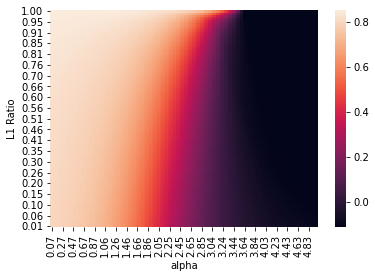

In [ ]:
plot_heatmap(np.fliplr(elastic_r2))

The heat map represents how the coefficient of variation R^2 varies with respect to alpha and L1 ratio. This heat map shows R^2 is highly dependent on alpha, and as the alpha decreases, the R^2 increases.In this scenario, the best model is achieved using a very low alpha value, which indicates that nearly all the features have high predictive power and the model performs very close to an unregularized linear regression. Conversely, R^2 improves as L1 value approaches 1 at a given alpha value. This indicates that lasso regression performs the best compared to ridge regression or a variation of the two because there some variables that had little to explain about life expectancy.


# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

## Answer 2

The main issue here is the proble of a bias-variance tradeoff. Having a small number of alphas with no CV or cross validation could lead to the issue described. A high alpha leads to a high bias and a low alpha leads to a higher variance. Using elastic net can be better solution here as the elastic net cross validation would help us find the best alpha with the lowest MSE ( Mean Squared Error) using different mix of ridge and lasso. The ridge method would be useful if many predictors are relevant and lasso would help zero down the irrelevant features.

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [ ]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("/content/q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)

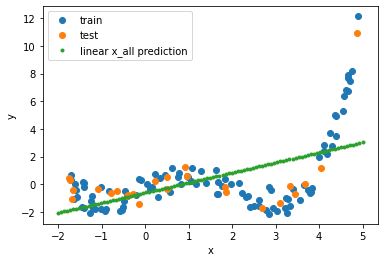

Linear model MSE:  4.739110717634691


In [ ]:
# create and fit linear model
lin_mod = LinearRegression()
lin_mod.fit(x_train,y_train)

# calculate MSE of test data and predicted values from linear model
y_pred_lin = lin_mod.predict(x_test)
lin_MSE = mean_squared_error(y_test, y_pred_lin)

# predict and plot on x_all using linear model
y_all_lin = lin_mod.predict(x_all)

plt.plot(x_train, y_train, marker='o', linestyle='None', label='train')
plt.plot(x_test, y_test, marker='o', linestyle = 'None', label='test')
plt.plot(x_all, y_all_lin, marker='.', linestyle = 'None', label='linear x_all prediction')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='best')
plt.show()

print('Linear model MSE: ', lin_MSE)

### (b)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# initializing function for generating polynomial features from input sample
poly2 = PolynomialFeatures(degree = 2)
poly3 = PolynomialFeatures(degree = 3)
poly4 = PolynomialFeatures(degree = 4)
poly12 = PolynomialFeatures(degree = 12)

# initializing linear regression models
poly2_mod = LinearRegression(fit_intercept=False)
poly3_mod = LinearRegression(fit_intercept=False)
poly4_mod = LinearRegression(fit_intercept=False)
poly12_mod = LinearRegression(fit_intercept=False)

# fit linear models to respectively transformed datapoints
poly2_mod.fit(poly2.fit_transform(x_train), y_train)
poly3_mod.fit(poly3.fit_transform(x_train), y_train)
poly4_mod.fit(poly4.fit_transform(x_train), y_train)
poly12_mod.fit(poly12.fit_transform(x_train), y_train)

# model predictions on training set
poly2_pred_train = poly2_mod.predict(poly2.fit_transform(x_train))
poly3_pred_train = poly3_mod.predict(poly3.fit_transform(x_train))
poly4_pred_train = poly4_mod.predict(poly4.fit_transform(x_train))
poly12_pred_train = poly12_mod.predict(poly12.fit_transform(x_train))

# model predictions on test set
poly2_pred_test = poly2_mod.predict(poly2.fit_transform(x_test))
poly3_pred_test = poly3_mod.predict(poly3.fit_transform(x_test))
poly4_pred_test = poly4_mod.predict(poly4.fit_transform(x_test))
poly12_pred_test = poly12_mod.predict(poly12.fit_transform(x_test))

# model MSEs on train
poly2_MSE_train = mean_squared_error(y_train, poly2_pred_train)
poly3_MSE_train = mean_squared_error(y_train, poly3_pred_train)
poly4_MSE_train = mean_squared_error(y_train, poly4_pred_train)
poly12_MSE_train = mean_squared_error(y_train, poly12_pred_train)

# model MSEs on test
poly2_MSE_test = mean_squared_error(y_test, poly2_pred_test)
poly3_MSE_test = mean_squared_error(y_test, poly3_pred_test)
poly4_MSE_test = mean_squared_error(y_test, poly4_pred_test)
poly12_MSE_test = mean_squared_error(y_test, poly12_pred_test)

Train MSEs: 
2nd degree polynomial MSE:  3.241421853814466
3rd degree polynomial MSE:  1.4201223351315235
4th degree polynomial MSE:  0.37459501477803114
12th degree polynomial MSE:  0.32974847922667716

Test MSEs: 
2nd degree polynomial MSE:  3.118688012803552
3rd degree polynomial MSE:  1.6698703639509418
4th degree polynomial MSE:  0.2793974390234435
12th degree polynomial MSE:  0.4022876206953409


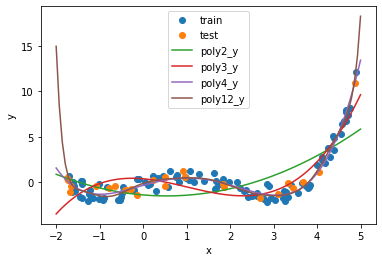

In [ ]:
# Report MSEs
print('Train MSEs: ')
print('2nd degree polynomial MSE: ', poly2_MSE_train)
print('3rd degree polynomial MSE: ', poly3_MSE_train)
print('4th degree polynomial MSE: ', poly4_MSE_train)
print('12th degree polynomial MSE: ', poly12_MSE_train)

print('\nTest MSEs: ')
print('2nd degree polynomial MSE: ', poly2_MSE_test)
print('3rd degree polynomial MSE: ', poly3_MSE_test)
print('4th degree polynomial MSE: ', poly4_MSE_test)
print('12th degree polynomial MSE: ', poly12_MSE_test)

# Predict on all data using each trained polynomial model
poly2_pred_all = poly2_mod.predict(poly2.fit_transform(x_all))
poly3_pred_all = poly3_mod.predict(poly3.fit_transform(x_all))
poly4_pred_all = poly4_mod.predict(poly4.fit_transform(x_all))
poly12_pred_all = poly12_mod.predict(poly12.fit_transform(x_all))

# Plot all train and test points along with predicted polynomial curves
plt.plot(x_train, y_train, marker='o', linestyle='None', label='train')
plt.plot(x_test, y_test, marker='o', linestyle = 'None', label='test')
plt.plot(x_all, poly2_pred_all, linestyle = '-', label='poly2_y')
plt.plot(x_all, poly3_pred_all, linestyle = '-', label='poly3_y')
plt.plot(x_all, poly4_pred_all, linestyle = '-', label='poly4_y')
plt.plot(x_all, poly12_pred_all, linestyle = '-', label='poly12_y')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='best')
plt.show()

### (c)

The 12th degree polynomial model performs the best on the training set, but the 4th degree polynomial model performs the best on the test set. This may occur because while the 12th degree polynomial may fit similar to the 4th degree polynomial, there is a high variance associated with the model. Therefore, the 4th degree polynomial has already greatly significantly minimized the bias such that the 12th degree polynomial introduces more variance. This can be observed in the 4th degree polynomial displaying both the best test MSE, and visually fitting x_all more accurately than the 12th degree polynomial model.

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [45]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef) # = please fill this to update self.coef using SGD
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                prediction = self.linearPredict(X[i])
                error = y[i] - prediction
                # Compute gradients
                gradient = error*X[i]
                #self.gradient = gradient
                
                #Update weights
                self.sgd(gradient)             
           
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        #compute dot product of self.coef and X
        prediction = np.dot(X, self.coef)
        return prediction

In [46]:
data = pd.read_csv('/content/q4_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer 

### 1.

## Loss Function 
$L = SSE = \sum_{i=1}^n (y_{i} - \hat{y}_{i})^2$

$L = \sum_{i=1}^n (y_i - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2x_1x_2 + \hat{w}_3e^{-x_1}) )^2$


## Minimize Loss Function
$\partial L /  \partial \hat{y} = 2\sum_{i=1}^n(\hat{y} - y)$



 
## Gradient = $\partial L /  \partial w$

$\partial L /  \partial w = (\partial L /  \partial \hat{y}) * (\partial \hat{y} /  \partial w$)


$\partial \hat{y} /  \partial w_{0} = 1$

$\partial \hat{y} /  \partial w_{1} = x_{1}$

$\partial \hat{y} /  \partial w_{2} = x_{1}*x_{2}$

$\partial \hat{y} /  \partial w_{3} = e^{-x_{1}}$

## Coefficient Updates $w^{new} = w^{current} - \eta(\partial L /  \partial w)$
$w^{new}_{0} = w^{current}_{0} - \sum_{i=1}^n\eta[2(\hat{y} - y) * 1]$

$w^{new}_{1} = w^{current}_{1} - \sum_{i=1}^n\eta[2(\hat{y} - y) * x_{1}]$

$w^{new}_{2} = w^{current}_{2} - \sum_{i=1}^n\eta[2(\hat{y} - y) * x_{1}*x_{2}]$

$w^{new}_{3} = w^{current}_{3} - \sum_{i=1}^n\eta[2(\hat{y} - y) * e^{-x_{1}}]$

## 2. Using SGD

In [47]:
results = []
for l in learning_rate:
    for r in regularization:
        reg = Regression(learning_rate= l, regularization= r, n_epoch= n_epochs)
        result = reg.fit(X, y, update_rule='sgd', plot=False)
        results.append((l, r, reg.lowest_mse))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


In [48]:
results

[(0.0001, 0, 0.03682051179745846),
 (0.0001, 10, 0.056125950640304956),
 (0.0001, 100, 0.0636364326583134),
 (0.001, 0, 0.030495991520073523),
 (0.001, 10, 0.05603419974127593),
 (0.001, 100, 0.06349227789221855),
 (0.01, 0, 0.027391087575201017),
 (0.01, 10, 0.054626354580913854),
 (0.01, 100, 0.06343718475083979),
 (0.1, 0, 0.030987628014180493),
 (0.1, 10, 0.05525368026081914),
 (0.1, 100, nan),
 (1, 0, inf),
 (1, 10, nan),
 (1, 100, nan),
 (10, 0, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 0, nan),
 (100, 10, nan),
 (100, 100, nan)]

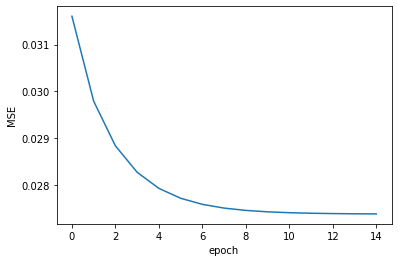

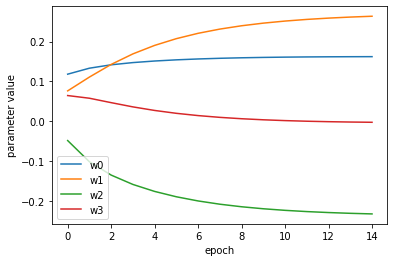

In [49]:
reg = Regression(0.01, 0, n_epochs)
results = reg.fit(X, y, update_rule='sgd', plot=True)

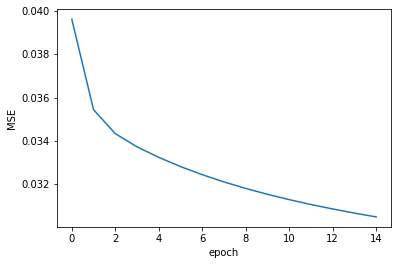

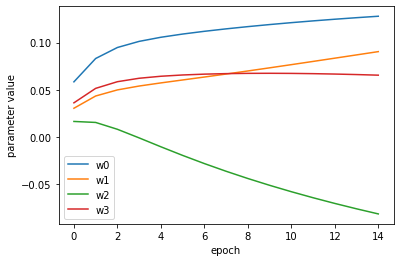

In [ ]:
sgd_mod1 = Regression(0.001, 0, n_epochs)
sgd_mod1_plot = sgd_mod1.fit(X, y, update_rule='sgd', plot=True)